In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pic
from sklearn.model_selection  import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection  import KFold
from sklearn import tree, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# reading a csv file using pandas library
iris_data = pd.read_csv('D:/Analytics/UCF/Machine Learning/Assignments/Iris.csv')

In [4]:
iris_data #View Data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
iris_data.shape # Number of rows and columns

(150, 5)

In [6]:
iris_data.info() # Describe column names and its types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris_data['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
iris_data.Species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: Species, dtype: int64

In [9]:
iris_data['Species'],_ = pd.factorize(iris_data['Species'])

In [10]:
iris_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
iris_data.info() # Describe column names and its types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [12]:
iris_data_X = iris_data.iloc[:,0:4]

In [13]:
iris_data_X

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
iris_data_y = iris_data.iloc[:,-1]

In [15]:
iris_data_y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [16]:
#Train and Test data in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(iris_data_X, iris_data_y, test_size=0.2)

In [17]:
iris_data_DT = tree.DecisionTreeClassifier() # Run Decision Tree Algorithm

In [18]:
iris_data_DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(167.4, 195.696, 'X[3] <= 0.75\ngini = 0.666\nsamples = 120\nvalue = [39, 42, 39]'),
 Text(141.64615384615385, 152.208, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(193.15384615384616, 152.208, 'X[3] <= 1.75\ngini = 0.499\nsamples = 81\nvalue = [0, 42, 39]'),
 Text(103.01538461538462, 108.72, 'X[2] <= 4.95\ngini = 0.162\nsamples = 45\nvalue = [0, 41, 4]'),
 Text(51.50769230769231, 65.232, 'X[3] <= 1.65\ngini = 0.048\nsamples = 41\nvalue = [0, 40, 1]'),
 Text(25.753846153846155, 21.744, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(77.26153846153846, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 65.232, 'X[3] <= 1.6\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(128.76923076923077, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(283.2923076923077, 108.72, 'X[2] <= 4.85\ngini = 0.054\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(257

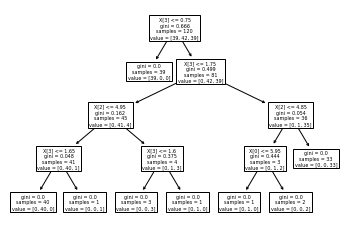

In [19]:
#Displaying the decision tree
tree.plot_tree(iris_data_DT.fit(X_train, y_train))

In [20]:
iris_data_DT_pred =iris_data_DT.predict(X_test) # Prediction

In [21]:
iris_data_DT_pred

array([1, 2, 1, 1, 0, 0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 2, 0,
       0, 0, 0, 2, 0, 1, 2, 1], dtype=int64)

In [22]:
iris_data_DT.score(X_test, y_test) * 100   #Accuracy

96.66666666666667

In [23]:
DT_Misclass = (y_test != iris_data_DT_pred).sum()
print('Misclassified samples: {}'.format(DT_Misclass))

Misclassified samples: 1


In [24]:
print(confusion_matrix(y_test,iris_data_DT_pred))

[[11  0  0]
 [ 0  7  1]
 [ 0  0 11]]


In [25]:
print(classification_report(y_test,iris_data_DT_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.88      0.93         8
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [26]:
iris_data_DT_kf = KFold(n_splits = 5,shuffle=False)

In [27]:
for i, (train_set, test_set) in enumerate(iris_data_DT_kf.split(iris_data_X)):
    print(train_set, test_set)

[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 1

In [28]:
# range of k we want to try
DT_k_fold = [1,2,3,4,5]

In [29]:
# empty list to store scores
DT_Acc_val = []

In [32]:
DT_Acc_val = cross_val_score(iris_data_DT, iris_data_X, iris_data_y, scoring='accuracy', cv = 5)* 100
print("Accuracy are: ", DT_Acc_val)

Accuracy are:  [ 96.66666667  96.66666667  90.          96.66666667 100.        ]


In [33]:
DT_Mean_Acc = cross_val_score(iris_data_DT, iris_data_X, iris_data_y, scoring='accuracy', cv = 5).mean() * 100
print("Accuracy of Decision Tree is: " , DT_Mean_Acc)

Accuracy of Decision Tree is:  95.33333333333334


In [34]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as pic
%matplotlib inline

Text(0.5, 1.0, 'Accuracy by Decision Tree')

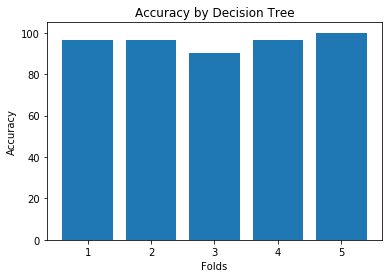

In [35]:
pic.bar(DT_k_fold, DT_Acc_val)
pic.xlabel('Folds')
pic.ylabel('Accuracy')
pic.title('Accuracy by Decision Tree')

# KNN Model

In [36]:
# Split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(iris_data_X, iris_data_y, test_size=0.2)

In [37]:
iris_data_knn = KNeighborsClassifier(n_neighbors=5) # KNN Algorithm

In [38]:
iris_data_knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
iris_data_knn_pred = iris_data_knn.predict(X_test) #Prediction

In [40]:
iris_data_knn_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 0, 2, 0, 2, 0, 0, 2], dtype=int64)

In [41]:
iris_data_knn.score(X_test, y_test) * 100    #Accuracy

93.33333333333333

In [42]:
KNN_Misclass = (y_test != iris_data_knn_pred).sum()
print('Misclassified samples: {}'.format(KNN_Misclass))

Misclassified samples: 2


In [43]:
print(confusion_matrix(y_test,iris_data_knn_pred))

[[13  0  0]
 [ 0  7  2]
 [ 0  0  8]]


In [44]:
print(classification_report(y_test,iris_data_knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.78      0.88         9
           2       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



In [45]:
iris_data_knn_kf = KFold(n_splits = 5,shuffle=False)

In [46]:
for i, (train_set, test_set) in enumerate(iris_data_knn_kf.split(iris_data_X)):
    print(train_set, test_set)

[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 1

In [47]:
# range of k we want to try
Knn_k_fold = [1,2,3,4,5]

In [48]:
# empty list to store scores
Knn_Acc_val = []

In [49]:
Knn_Acc_val = cross_val_score(iris_data_knn, iris_data_X, iris_data_y, scoring='accuracy', cv = 5) * 100
print("Accuracy are: ", Knn_Acc_val)

Accuracy are:  [ 96.66666667 100.          93.33333333  96.66666667 100.        ]


In [50]:
Knn_Mean_Acc = cross_val_score(iris_data_knn, iris_data_X, iris_data_y, scoring='accuracy', cv = 5).mean() * 100
print("Accuracy of KNN is: " , Knn_Mean_Acc)

Accuracy of KNN is:  97.33333333333334


In [51]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as pic
%matplotlib inline

Text(0.5, 1.0, 'Accuracy by KNN')

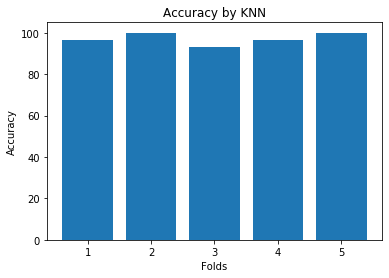

In [52]:
pic.bar(Knn_k_fold, Knn_Acc_val)
pic.xlabel('Folds')
pic.ylabel('Accuracy')
pic.title('Accuracy by KNN')

In [53]:
# we could choose differenct neighbors to see which K is the best K
# choose k between 1 to 31
k_range = range(1, 31)

In [54]:
k_scores = []

In [55]:
# use iteration to calculate different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    iris_data_knn = KNeighborsClassifier(n_neighbors=k)
    knn_Acc_Scores = cross_val_score(iris_data_knn, iris_data_X, iris_data_y, cv=5, scoring='accuracy')
    k_scores.append(knn_Acc_Scores.mean())

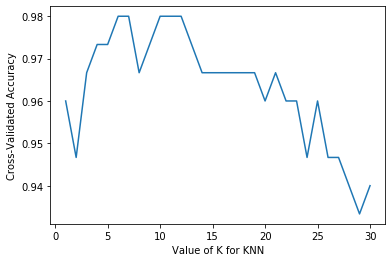

In [56]:
# plot to see clearly
pic.plot(k_range, k_scores)
pic.xlabel('Value of K for KNN')
pic.ylabel('Cross-Validated Accuracy')
pic.show()

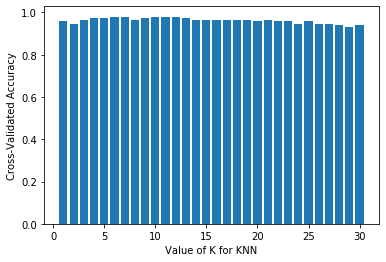

In [65]:
# plot to see clearly
pic.bar(k_range, k_scores)
pic.xlabel('Value of K for KNN')
pic.ylabel('Cross-Validated Accuracy')
pic.show()

In [ ]:
# As we can see the best K is between 6–13, after 13 the accuracy got decreased due to under-fitting.